### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.io as pio
pio.renderes.default = "svg"


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [8]:
data.isna().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
data[data['Bar'].isna() | data['CoffeeHouse'].isna() | data['CarryAway'].isna() | data['RestaurantLessThan20'].isna() | data['Restaurant20To50'].isna()].shape

(605, 26)

There are 12576 records with missing values for the 'car' field. Since this is a large percentage of the total record count, we will drop this column and not consider it for further analysis.

There are 605 records with missing values in one or more of these columns: Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50. Since this is a small portion of the total record count, we will drop these 605 records.

In [10]:
df = data.drop(columns='car').drop(data[data['Bar'].isna() | data['CoffeeHouse'].isna() | data['CarryAway'].isna() | data['RestaurantLessThan20'].isna() | data['Restaurant20To50'].isna()].index)

In [11]:
df.shape

(12079, 25)

Examine distinct values and counts of categorical fields.

In [12]:
df['destination'].value_counts()


destination
No Urgent Place    5970
Home               3085
Work               3024
Name: count, dtype: int64

In [13]:
df['passanger'].value_counts()

passanger
Alone        6969
Friend(s)    3148
Partner      1024
Kid(s)        938
Name: count, dtype: int64

In [14]:
df['weather'].value_counts()

weather
Sunny    9601
Snowy    1331
Rainy    1147
Name: count, dtype: int64

In [15]:
df['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

In [16]:
df['time'].value_counts()

time
6PM     3078
7AM     3024
10AM    2158
2PM     1916
10PM    1903
Name: count, dtype: int64

In [17]:
df['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [18]:
df['expiration'].value_counts()

expiration
1d    6760
2h    5319
Name: count, dtype: int64

In [19]:
df['gender'].value_counts()

gender
Female    6199
Male      5880
Name: count, dtype: int64

In [20]:
df['age'].value_counts()

age
21         2537
26         2399
31         1925
50plus     1732
36         1253
41         1065
46          664
below21     504
Name: count, dtype: int64

In [21]:
df['maritalStatus'].value_counts()

maritalStatus
Married partner      4831
Single               4588
Unmarried partner    2048
Divorced              504
Widowed               108
Name: count, dtype: int64

In [22]:
df['has_children'].value_counts()

has_children
0    7145
1    4934
Name: count, dtype: int64

In [23]:
df['education'].value_counts()

education
Some college - no degree                  4219
Bachelors degree                          4021
Graduate degree (Masters or Doctorate)    1808
Associates degree                         1066
High School Graduate                       877
Some High School                            88
Name: count, dtype: int64

In [24]:
df['occupation'].value_counts()

occupation
Unemployed                                   1814
Student                                      1497
Computer & Mathematical                      1368
Sales & Related                              1072
Education&Training&Library                    855
Management                                    772
Office & Administrative Support               617
Arts Design Entertainment Sports & Media      564
Business & Financial                          516
Retired                                       473
Food Preparation & Serving Related            276
Healthcare Support                            242
Healthcare Practitioners & Technical          222
Legal                                         219
Community & Social Services                   219
Transportation & Material Moving              218
Protective Service                            175
Architecture & Engineering                    175
Life Physical Social Science                  170
Construction & Extraction              

In [25]:
df['income'].value_counts()

income
$25000 - $37499     1919
$12500 - $24999     1728
$100000 or More     1692
$37500 - $49999     1689
$50000 - $62499     1565
Less than $12500    1014
$62500 - $74999      840
$87500 - $99999      818
$75000 - $87499      814
Name: count, dtype: int64

In [26]:
df['Bar'].value_counts()

Bar
never    4934
less1    3394
1~3      2370
4~8      1054
gt8       327
Name: count, dtype: int64

In [27]:
df['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3298
1~3      3159
never    2852
4~8      1659
gt8      1111
Name: count, dtype: int64

In [28]:
df['CarryAway'].value_counts()

CarryAway
1~3      4502
4~8      4083
less1    1790
gt8      1573
never     131
Name: count, dtype: int64

In [29]:
df['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5163
4~8      3450
less1    2005
gt8      1285
never     176
Name: count, dtype: int64

In [30]:
df['Restaurant20To50'].value_counts()

Restaurant20To50
less1    5859
1~3      3202
never    2070
4~8       684
gt8       264
Name: count, dtype: int64

In [31]:
df['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12079
Name: count, dtype: int64

In [32]:
df['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    6779
0    5300
Name: count, dtype: int64

In [33]:
df['toCoupon_GEQ25min'].value_counts()

toCoupon_GEQ25min
0    10637
1     1442
Name: count, dtype: int64

In [34]:
df['direction_same'].value_counts()

direction_same
0    9480
1    2599
Name: count, dtype: int64

In [35]:
df['direction_opp'].value_counts()

direction_opp
1    9480
0    2599
Name: count, dtype: int64

In [36]:
df[['direction_same', 'direction_opp']].corr()

,direction_same,direction_opp
direction_same,1.0,-1.0
direction_opp,-1.0,1.0


4. What proportion of the total observations chose to accept the coupon? 



In [37]:
df.query('Y == 1')['Y'].agg('count') / df['Y'].count()

0.5693352098683666

57% of observations chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

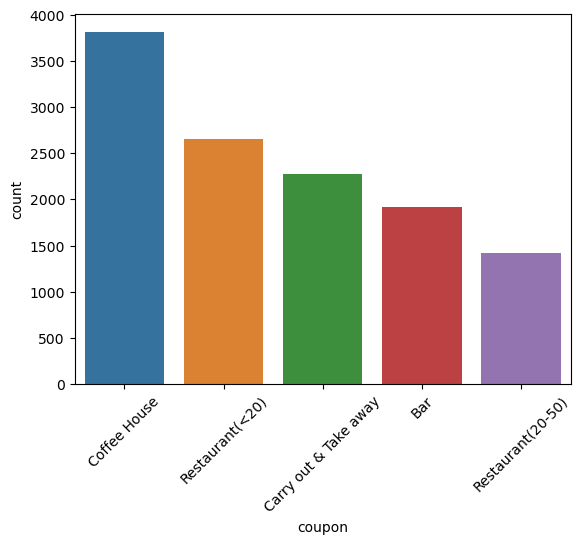

In [38]:
coupon_counts = df['coupon'].value_counts().rename_axis('coupon').reset_index(name='count')
sns.barplot(data=coupon_counts, x='coupon', y='count', saturation=0.7)
plt.xticks(rotation=45)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

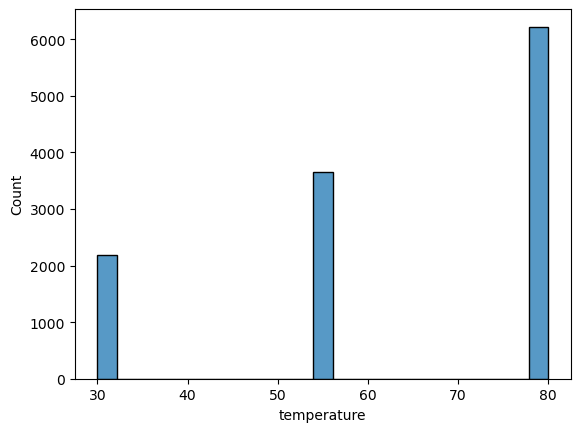

In [39]:
sns.histplot(df['temperature'])

Plotting the count of coupons by accepted Y/N (0=N, 1=Y)

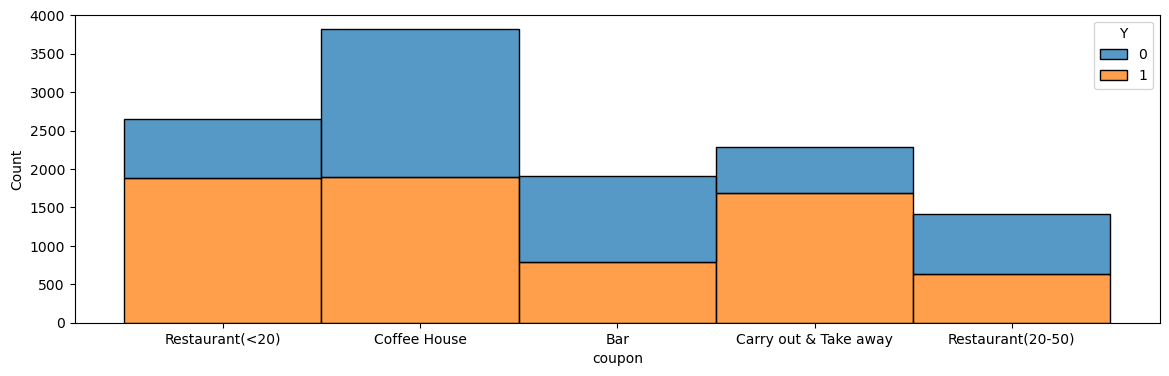

In [40]:
plt.figure(figsize=(14,4))
sns.histplot(data=df, x='coupon', hue='Y', multiple="stack")
plt.show()

Coupon acceptance rate by type of coupon:

In [41]:
coupon_accept = df.query('Y == 1').groupby('coupon')['Y'].agg('count') / df.groupby('coupon')['Y'].agg('count')
coupon_accept

coupon
Bar                      0.411918
Carry out & Take away    0.737719
Coffee House             0.496331
Restaurant(20-50)        0.446013
Restaurant(<20)          0.709009
Name: Y, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bar'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Restaurant(20-50)'),
  Text(4, 0, 'Restaurant(<20)')])

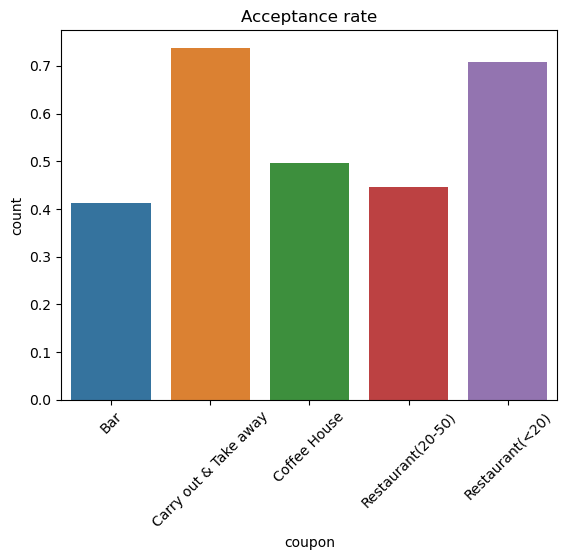

In [42]:
sns.barplot(data=coupon_accept.rename_axis('coupon').reset_index(name='count'), x='coupon', y='count', saturation=0.7)
plt.title('Acceptance rate')
plt.xticks(rotation=45)

- Carry out & Take away and Retaurant(<20) coupons have the highest acceptance rate, both above 70%. 
- Coffee House coupon acceptance rate is almost 50%
- Restaurant(20-50) coupon acceptance rate is about 45%
- Bar coupon acceptance rate is about 41%

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [43]:
df_bar = df[df['coupon'] == 'Bar'].reindex()
df_bar.shape

(1913, 25)

2. What proportion of bar coupons were accepted?


In [44]:
df_bar.query('Y == 1')['Y'].agg('count') / df_bar['Y'].count()

0.41191845269210664

41% of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


First, get acceptance rate by 'Bar' - bar visit frequency.

In [45]:
df_bar.query('Y == 1').groupby('Bar')['Y'].agg('count') / df_bar.groupby('Bar')['Y'].agg('count')

Bar
1~3      0.646438
4~8      0.775510
gt8      0.717391
less1    0.446655
never    0.189086
Name: Y, dtype: float64

Add a new column to the dataframe that groups bar visit frequency into two values: '3 or fewer', and '4 or more'

Create a function to be used in the grouping, and then use the function while creating a new field named 'bar_freq'.

In [46]:
def get_bar_freq(x):
    if x in ('never','less1','1~3'):
        return '3 or fewer'
    elif x in ('4~8','gt8'):
        return '4 or more'
    else:
        return 'Unknown'
    
df_bar['Bar_freq'] = df_bar['Bar'].apply(lambda x: get_bar_freq(x))

df_bar['Bar_freq'].value_counts()

Bar_freq
3 or fewer    1720
4 or more      193
Name: count, dtype: int64

In [47]:
df_bar.query('Y == 1').groupby('Bar_freq')['Y'].agg('count') / df_bar.groupby('Bar_freq')['Y'].agg('count')

Bar_freq
3 or fewer    0.372674
4 or more     0.761658
Name: Y, dtype: float64

In [48]:
# Alternate way to calculate 
df3d = df_bar.groupby(df_bar['Bar'].isin(['never','less1','1~3']))['Y'].agg('count')
df3n = df_bar.query('Y == 1').groupby(df_bar['Bar'].isin(['never','less1','1~3']))['Y'].agg('count')
df3n/df3d

Bar
False    0.761658
True     0.372674
Name: Y, dtype: float64

Acceptance rate for bar-related coupons is 37% among people who went to a bar 3 or fewer times, compared to 76% among people who went to a bar 4 or more times.

Plot of count of people who received bar coupons by frequency of bar visits along with acceptance (0=No, 1=Yes):

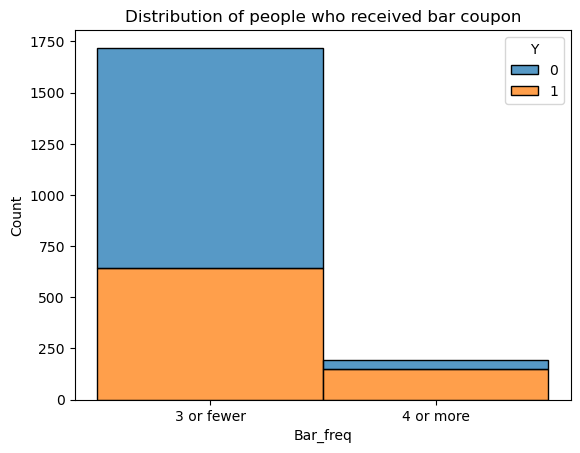

In [49]:
sns.histplot(data=df_bar, x='Bar_freq', hue='Y', multiple='stack')
plt.title('Distribution of people who received bar coupon')
plt.show()

Plotting the acceptance rate of drivers who visit bars 3 times or fewer vs. drivers who visit bars 4 times or more a month:

<Axes: xlabel='Bar_freq'>

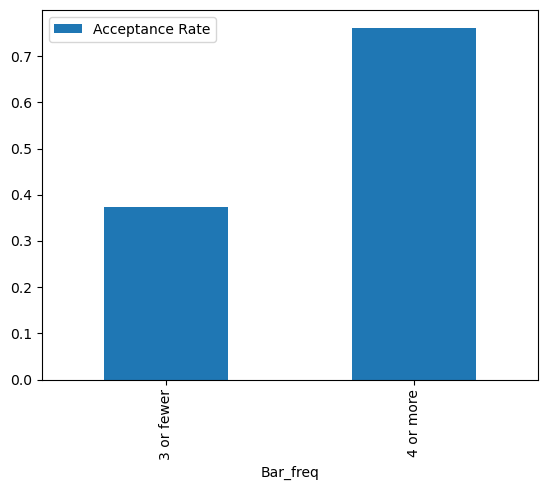

In [50]:
((df_bar.query('Y == 1').groupby('Bar_freq')['Y'].agg('count') / df_bar.groupby('Bar_freq')['Y'].agg('count')).to_frame().reset_index().rename(columns={'Y':'Acceptance Rate'})).plot.bar(x='Bar_freq')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Convert age values to integer and save into a new field 'age_int', which can be used in queries.

In [51]:
# Convert age to integer type, after setting '50plus' to 50 and 'below21' as 20
def convert_int(x):
    if x == 'below21':
        return 20
    elif x == '50plus':
        return 50
    else:
        return int(x)

df_bar['age_int'] = df_bar.apply(lambda z: convert_int(z.age), axis=1)

df_bar['age_int'].value_counts()



age_int
21    397
26    368
31    324
50    273
36    196
41    171
46    103
20     81
Name: count, dtype: int64

Add a new field that groups into two groups: 
1. drivers who go to a bar more than once a month and are over the age of 25 (as 'over 25 and freq'), and 
2. everyone else (as 'not over 25/freq')

In [52]:
def get_age_bar_freq(x, y):
    if x in ('1~3','4~8','gt8'):
        if y > 25:
            return 'over 25 and freq'
        else:
            return 'not over 25/freq'
    else:
        return 'not over 25/freq'
    
df_bar['Bar_age_freq'] = df_bar.apply(lambda z: get_age_bar_freq(z.Bar, z.age_int), axis=1)

df_bar['Bar_age_freq'].value_counts()

Bar_age_freq
not over 25/freq    1510
over 25 and freq     403
Name: count, dtype: int64

In [53]:
df_bar.query('Y == 1').groupby('Bar_age_freq')['Y'].agg('count') / df_bar.groupby('Bar_age_freq')['Y'].agg('count')

Bar_age_freq
not over 25/freq    0.337748
over 25 and freq    0.689826
Name: Y, dtype: float64

Alternate way to calculate acceptance rate for the two groups, without the use of additional fields:

In [54]:
# Alternate way to calculate acceptance rate for the group
df4d = df_bar.groupby((df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['age_int'] > 25))['Y'].agg('count')
df4n = df_bar.query('Y == 1').groupby((df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['age_int'] > 25))['Y'].agg('count')
df4n/df4d

False    0.337748
True     0.689826
Name: Y, dtype: float64

<Axes: xlabel='Bar_age_freq'>

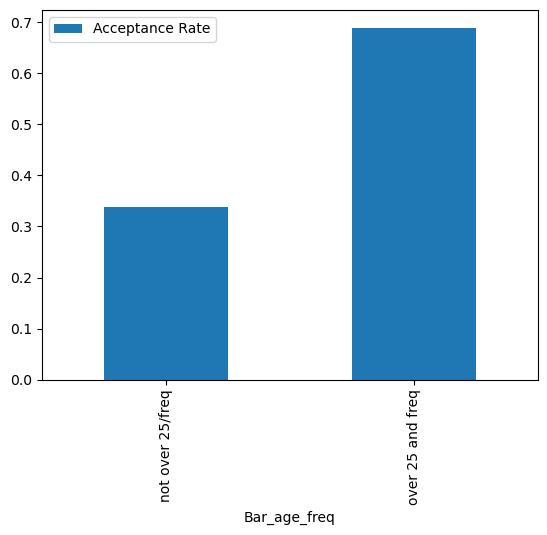

In [55]:
df_bar_age = df_bar.query('Y == 1').groupby('Bar_age_freq')['Y'].agg('count') / df_bar.groupby('Bar_age_freq')['Y'].agg('count')

(df_bar_age.to_frame().reset_index().rename(columns={'Y':'Acceptance Rate'})).plot.bar(x='Bar_age_freq')

Of the people who receive bar coupons, the acceptance rate was 69% for those who are over 25 and visit bars once a month or more, compared to 34% for others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [56]:
df5d = df_bar.groupby((df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['passanger'].isin(['Friend(s)','Partner'])) & (df_bar['occupation'] != 'Farming Fishing & Forestry'))['Y'].agg('count')
df5n = df_bar.query('Y == 1').groupby((df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['passanger'].isin(['Friend(s)','Partner'])) & (df_bar['occupation'] != 'Farming Fishing & Forestry'))['Y'].agg('count')
df5n / df5d


False    0.378770
True     0.714286
Name: Y, dtype: float64

<Axes: xlabel='freq bar,non-kid,non-farming'>

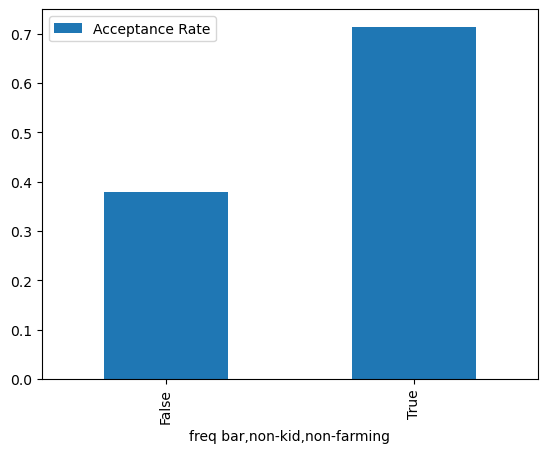

In [57]:
(df5n/df5d).to_frame().reset_index().rename(columns={'index':'freq bar,non-kid,non-farming','Y':'Acceptance Rate'}).plot.bar(x='freq bar,non-kid,non-farming')

Bar coupon acceptance rate for drivers who visit bars more than once a month and had passengers that were not kids and occupation that is other than farming, fishing or forestry was 71%, compared to 38% for other drivers.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [58]:
# Drivers who go to bars more than once a month, had passengers who were not a kid, and were no widowed
df6_1d = df_bar.groupby((df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['passanger'].isin(['Friend(s)','Partner'])) & (df_bar['maritalStatus'] != 'Widowed'))['Y'].agg('count')
df6_1n = df_bar.query('Y == 1').groupby((df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['passanger'].isin(['Friend(s)','Partner'])) & (df_bar['maritalStatus'] != 'Widowed'))['Y'].agg('count')
df6_1n / df6_1d

False    0.378770
True     0.714286
Name: Y, dtype: float64

Drivers who go to bars more than once a month, had passengers who were not a kid, and were no widowed have a bar coupon acceptance rate of 71%, compared to 38% for the rest of the driver population.

In [59]:
# Drivers who go to bars more than once a month and are under 30
df6_2d = df_bar.groupby((df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['age_int'] < 30))['Y'].agg('count')
df6_2n = df_bar.query('Y == 1').groupby((df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['age_int'] < 30))['Y'].agg('count')
df6_2n / df6_2d

False    0.348265
True     0.719512
Name: Y, dtype: float64

Drivers who go to bars more than once a month and are under 30 have an acceptance rate of 72%, compared to 35% for the rest of the population.

In [60]:
# Drivers who go to cheap restaurants more than 4 times month and income less than 50K
df6_3d = df_bar.groupby((df_bar['RestaurantLessThan20'].isin(['4~8','gt8'])) & (df_bar['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])))['Y'].agg('count')
df6_3n = df_bar.query('Y == 1').groupby((df_bar['RestaurantLessThan20'].isin(['4~8','gt8'])) & (df_bar['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])))['Y'].agg('count')
df6_3n / df6_3d

False    0.402532
True     0.456456
Name: Y, dtype: float64

Drivers who go to cheap restaurants more than 4 times month and income less than 50K have a 46% acceptance rate for bar coupons, compared to 40% acceptance rate for the rest of the driver population.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypotheses about drivers who accepted the bar coupons:

- Drivers who make frequent visits to bars (4 or more times a month) are more likely to accept bar coupons.
- Drivers who are over 25 and visit bars at least once a month are more likely to accept bar coupons.
- Drivers who visit bars, driving with adult passengers and not in farming/fishing/forestry are more likely to accept bar coupons than others.
- Drivers who go to cheap restaurants more than 4 times a month and income less than 50k are marginally more likely to accept bar coupons than others.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Exploring drivers who were offered a coupon for an expensive restaurant (20-50). Creating a separate data frame to hold data for drivers who were given a restaurant (20-50) coupon.

In [61]:
df_rest = df[df['coupon'] == 'Restaurant(20-50)'].reindex()
df_rest.shape

(1417, 25)

Acceptance rate of drivers who received a restaurant coupon.

In [62]:
df_rest.query('Y == 1')['Y'].agg('count') / df_rest['Y'].count()

0.44601270289343686

44.6% of drivers who received a coupon for expensive restaurants accepted it.

In [63]:
# Acceptance rate of drivers who are driving with a partner vs. driving alone or with kids
df_rest_1d = df_rest.groupby(df_rest['passanger'].isin(['Partner']))['Y'].agg('count')
df_rest_1n = df_rest.query('Y == 1').groupby(df_rest['passanger'].isin(['Partner']))['Y'].agg('count')
df_rest_1n/df_rest_1d

passanger
False    0.42701
True     0.62500
Name: Y, dtype: float64

Drivers driving with a partner are more likely to accept a coupon to expensive restaurants than others (63% vs 43%).

In [64]:
# Drivers who go to expensive restaurants at least once a month vs. other
df_rest_2d = df_rest.groupby(df_rest['Restaurant20To50'].isin(['1~3','4~8','gt8']))['Y'].agg('count')
df_rest_2n = df_rest.query('Y == 1').groupby(df_rest['Restaurant20To50'].isin(['1~3','4~8','gt8']))['Y'].agg('count')
df_rest_2n/df_rest_2d

Restaurant20To50
False    0.388172
True     0.556468
Name: Y, dtype: float64

Drivers who visit expensive restaurants at least once a month are more likely to accept a coupon to an expensive restaurant than others (56% to 39%).

In [65]:
# Drivers who make more than $50k vs others
df_rest_3d = df_rest.groupby(df_rest['income'].isin(['$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']))['Y'].agg('count')
df_rest_3n = df_rest.query('Y == 1').groupby(df_rest['income'].isin(['$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']))['Y'].agg('count')
df_rest_3n/df_rest_3d

income
False    0.435083
True     0.457431
Name: Y, dtype: float64

Drivers who have income more than 50k are no more likely to accept the coupons than others.

In [66]:
# Drivers who make more than $62.5k vs others
df_rest_3d = df_rest.groupby(df_rest['income'].isin(['$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']))['Y'].agg('count')
df_rest_3n = df_rest.query('Y == 1').groupby(df_rest['income'].isin(['$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']))['Y'].agg('count')
df_rest_3n/df_rest_3d

income
False    0.446623
True     0.444890
Name: Y, dtype: float64

Drivers who make 62.5K or more are as likely to accept a coupon to expensive restaurants as others.

In [67]:
# Drivers who get a coupon that expires in 1d vs 2h
df_rest_4d = df_rest.groupby(df_rest['expiration'].isin(['1d']))['Y'].agg('count')
df_rest_4n = df_rest.query('Y == 1').groupby(df_rest['expiration'].isin(['1d']))['Y'].agg('count')
df_rest_4n/df_rest_4d

expiration
False    0.307087
True     0.523652
Name: Y, dtype: float64

Drivers who receive a coupon than expires in 1 day rather than 2 hours are more likely to accept a coupon to expensive restaurants than others (52% to 31%).

In [68]:
# Drivers who have children vs those who do not
df_rest_4d = df_rest.groupby(df_rest['has_children'].isin([1]))['Y'].agg('count')
df_rest_4n = df_rest.query('Y == 1').groupby(df_rest['has_children'].isin([1]))['Y'].agg('count')
df_rest_4n/df_rest_4d

has_children
False    0.475124
True     0.407830
Name: Y, dtype: float64

Drivers who do not have children are more likely to accept a coupon than drivers who have children (48% to 41%).

In [69]:
# Drivers who go to expensive restaurants more than once a month and have a bachelor's or graduate degree
df_rest_5d = df_bar.groupby((df_bar['Restaurant20To50'].isin(['1~3','4~8','gt8'])) & (df_bar['education'].isin(['Bachelors degree','Graduate degree (Masters or Doctorate)'])))['Y'].agg('count')
df_rest_5n = df_bar.query('Y == 1').groupby((df_bar['Restaurant20To50'].isin(['1~3','4~8','gt8'])) & (df_bar['education'].isin(['Bachelors degree','Graduate degree (Masters or Doctorate)'])))['Y'].agg('count')
df_rest_5n / df_rest_5d

False    0.400381
True     0.465875
Name: Y, dtype: float64

Drivers who go to expensive restaurants more than once a month and have a bachelors and graduate degree are slightly more likely to accept the coupon than others (47% to 40%).

Histogram of drivers who received the restaurant coupon, by destination and by accept flag (0=No, 1=Yes):

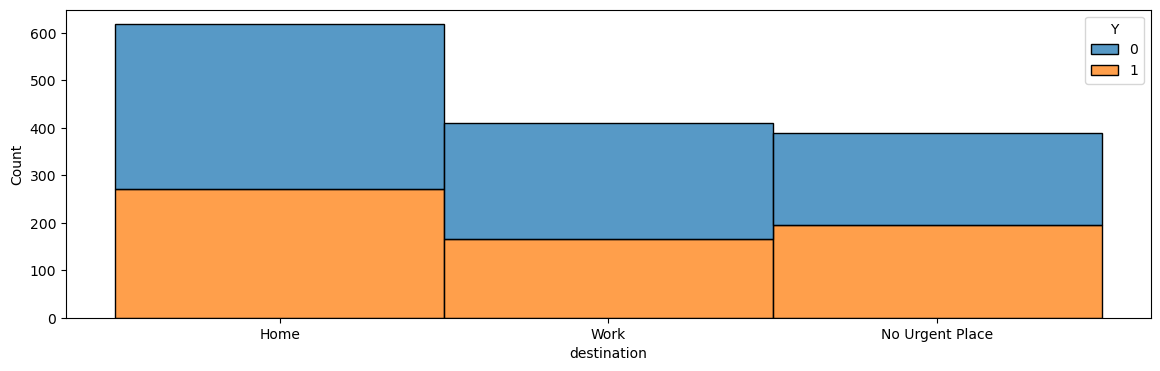

In [72]:
#px.histogram(df_rest, x='destination', color='Y')
#sns.histplot(df_rest, x='destination', color='Y')
plt.figure(figsize=(14,4))
sns.histplot(data=df_rest, x='destination', hue='Y', multiple="stack")
plt.show()

Histogram of drivers who received the restaurant coupon, by temperature and by accept flag (0=No, 1=Yes):

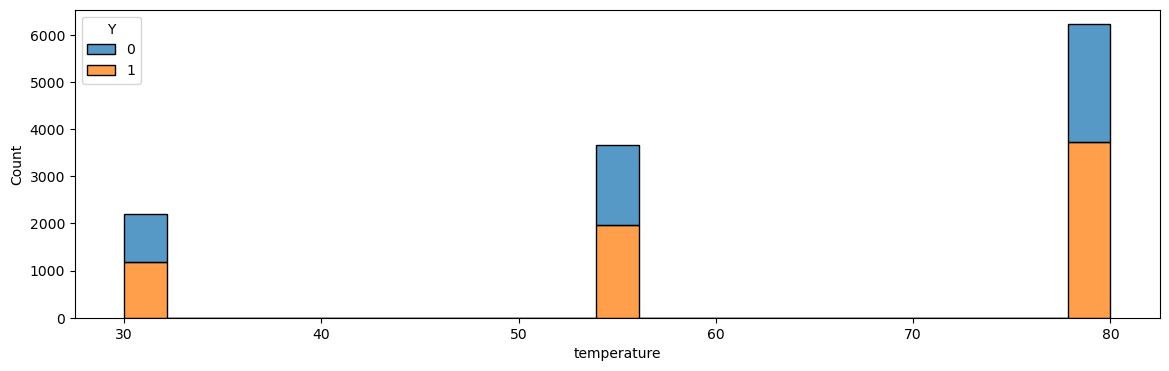

In [73]:
#px.histogram(df_rest, x='temperature', color='Y')
plt.figure(figsize=(14,4))
sns.histplot(data=df, x='temperature', hue='Y', multiple="stack")
plt.show()

Bar chart of drivers who received the restaurant coupon, by passenger type and by accept flag (0=No, 1=Yes), with acceptance percentage in each bar:

In [74]:
df_rest_pass = df_rest.groupby(['passanger', 'Y']).size().reset_index()
df_rest_pass['percentage'] = df_rest.groupby(['passanger', 'Y']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)).values
df_rest_pass.columns = ['passanger', 'Y', 'Counts', 'Percentage']

px.bar(df_rest_pass, x='passanger', y=['Counts'], color='Y', text=df_rest_pass['Percentage'])

In [78]:
df_rest_pass

,passanger,Y,Counts,Percentage
0,Alone,0,550,57.2
1,Alone,1,412,42.8
2,Friend(s),0,83,52.2
3,Friend(s),1,76,47.8
4,Kid(s),0,101,63.1
5,Kid(s),1,59,36.9
6,Partner,0,51,37.5
7,Partner,1,85,62.5


<Axes: xlabel='passanger', ylabel='Counts'>

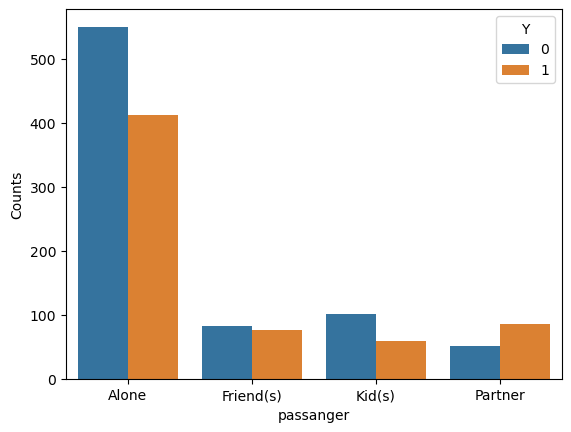

In [77]:
sns.barplot(data=df_rest_pass, x='passanger', y='Counts', hue='Y', saturation=0.7)

Drivers with partners as passengers have the highest acceptance rate (above 62%). Drivers with kids as passengers have the lowest acceptance rate (37%). 

In [80]:
df_rest_g = df_rest.groupby(['gender', 'Y']).size().reset_index()
df_rest_g['percentage'] = df_rest.groupby(['gender', 'Y']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)).values
df_rest_g.columns = ['gender', 'Y', 'Counts', 'Percentage']

px.bar(df_rest_g, x='gender', y=['Counts'], color='Y', text=df_rest_g['Percentage'])

In [81]:
df_rest_g

,gender,Y,Counts,Percentage
0,Female,0,408,57.2
1,Female,1,305,42.8
2,Male,0,377,53.6
3,Male,1,327,46.4


<Axes: xlabel='gender', ylabel='Counts'>

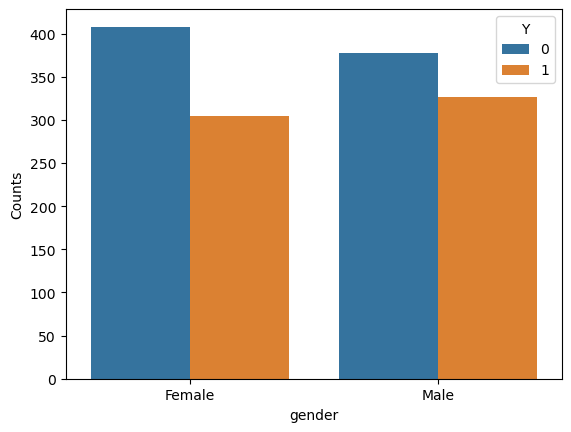

In [82]:
sns.barplot(data=df_rest_g, x='gender', y='Counts', hue='Y', saturation=0.7)

Male drivers have a slightly higher acceptance rate for restaurant coupons than female drivers.

In [84]:
df_rest_age = df_rest.groupby(['age', 'Y']).size().reset_index()
df_rest_age['percentage'] = df_rest.groupby(['age', 'Y']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)).values
df_rest_age.columns = ['age', 'Y', 'Counts', 'Percentage']

px.bar(df_rest_age, x='age', y=['Counts'], color='Y', text=df_rest_age['Percentage'])

In [85]:
df_rest_age

,age,Y,Counts,Percentage
0,21,0,162,57.0
1,21,1,122,43.0
2,26,0,131,48.5
3,26,1,139,51.5
4,31,0,131,58.0
5,31,1,95,42.0
6,36,0,79,51.0
7,36,1,76,49.0
8,41,0,72,55.4
9,41,1,58,44.6


<Axes: xlabel='age', ylabel='Counts'>

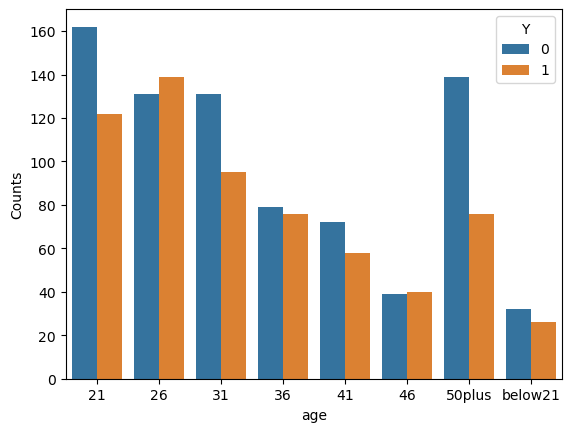

In [86]:
sns.barplot(data=df_rest_age, x='age', y='Counts', hue='Y', saturation=0.7)

Drivers who are of age 26 have the highest acceptance rate for restaurant coupons among all ages.

In [87]:
df_rest_ms = df_rest.groupby(['maritalStatus', 'Y']).size().reset_index()
df_rest_ms['percentage'] = df_rest.groupby(['maritalStatus', 'Y']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)).values
df_rest_ms.columns = ['maritalStatus', 'Y', 'Counts', 'Percentage']

px.bar(df_rest_ms, x='maritalStatus', y=['Counts'], color='Y', text=df_rest_ms['Percentage'])

In [88]:
df_rest_ms

,maritalStatus,Y,Counts,Percentage
0,Divorced,0,40,64.5
1,Divorced,1,22,35.5
2,Married partner,0,332,57.4
3,Married partner,1,246,42.6
4,Single,0,290,52.6
5,Single,1,261,47.4
6,Unmarried partner,0,112,52.8
7,Unmarried partner,1,100,47.2
8,Widowed,0,11,78.6
9,Widowed,1,3,21.4


<Axes: xlabel='maritalStatus', ylabel='Counts'>

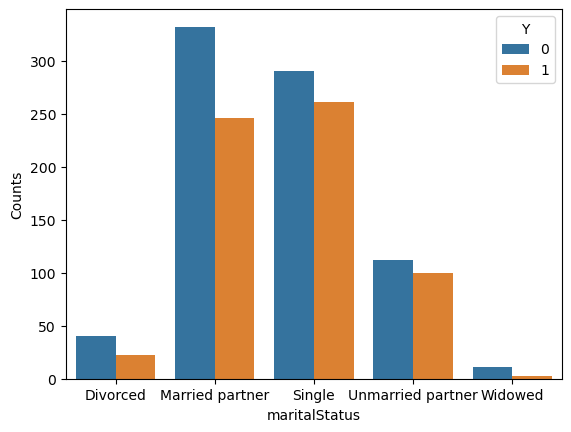

In [89]:
sns.barplot(data=df_rest_ms, x='maritalStatus', y='Counts', hue='Y', saturation=0.7)

Drivers who are single or have a parner (unmarried) have the highest acceptance rate for restaurant coupons.

In [90]:
df_rest_inc = df_rest.groupby(['income', 'Y']).size().reset_index()
df_rest_inc['percentage'] = df_rest.groupby(['income', 'Y']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)).values
df_rest_inc.columns = ['income', 'Y', 'Counts', 'Percentage']

px.bar(df_rest_inc, x='income', y=['Counts'], color='Y', text=df_rest_inc['Percentage'])

In [91]:
df_rest_inc

,income,Y,Counts,Percentage
0,$100000 or More,0,100,49.8
1,$100000 or More,1,101,50.2
2,$12500 - $24999,0,120,62.2
3,$12500 - $24999,1,73,37.8
4,$25000 - $37499,0,101,47.4
5,$25000 - $37499,1,112,52.6
6,$37500 - $49999,0,109,55.6
7,$37500 - $49999,1,87,44.4
8,$50000 - $62499,0,99,51.0
9,$50000 - $62499,1,95,49.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '$100000 or More'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$25000 - $37499'),
  Text(3, 0, '$37500 - $49999'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$75000 - $87499'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

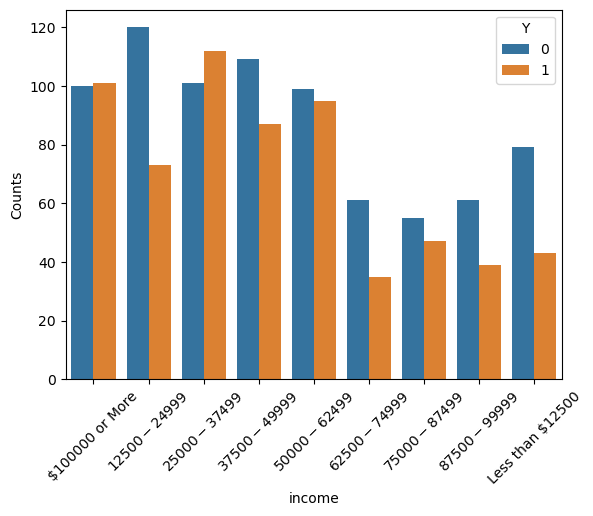

In [93]:
sns.barplot(data=df_rest_inc, x='income', y='Counts', hue='Y', saturation=0.7)
plt.xticks(rotation=45)

Drivers with incomes 25-37.5k have a higher acceptance rate for higher-end restaurants than other income groups.

In [94]:
df_rest_ed = df_rest.groupby(['education', 'Y']).size().reset_index()
df_rest_ed['percentage'] = df_rest.groupby(['education', 'Y']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)).values
df_rest_ed.columns = ['education', 'Y', 'Counts', 'Percentage']

px.bar(df_rest_ed, x='education', y=['Counts'], color='Y', text=df_rest_ed['Percentage'])

In [95]:
df_rest_ed

,education,Y,Counts,Percentage
0,Associates degree,0,79,55.6
1,Associates degree,1,63,44.4
2,Bachelors degree,0,274,57.3
3,Bachelors degree,1,204,42.7
4,Graduate degree (Masters or Doctorate),0,123,62.1
5,Graduate degree (Masters or Doctorate),1,75,37.9
6,High School Graduate,0,48,47.5
7,High School Graduate,1,53,52.5
8,Some High School,0,5,41.7
9,Some High School,1,7,58.3


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Associates degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Some High School'),
  Text(5, 0, 'Some college - no degree')])

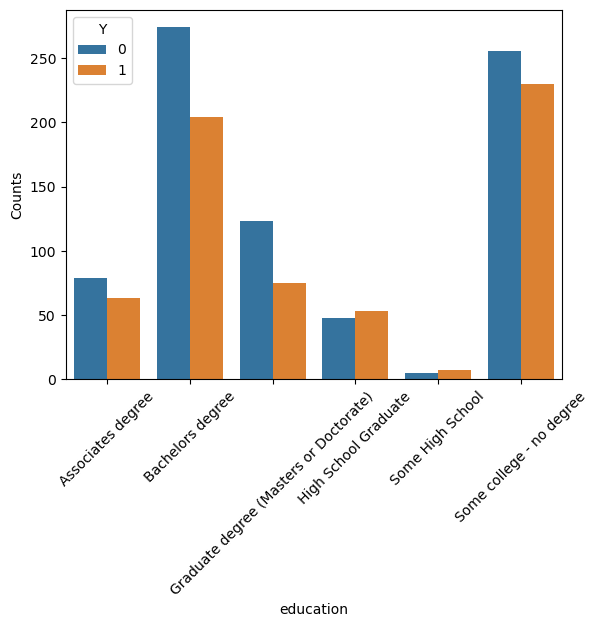

In [96]:
sns.barplot(data=df_rest_ed, x='education', y='Counts', hue='Y', saturation=0.7)
plt.xticks(rotation=45)

In [97]:
# Drivers who are high school graduates vs others
df_rest_4d = df_rest.groupby(df_rest['education'].isin(['High School Graduate']))['Y'].agg('count')
df_rest_4n = df_rest.query('Y == 1').groupby(df_rest['education'].isin(['High School Graduate']))['Y'].agg('count')
df_rest_4n/df_rest_4d

education
False    0.439970
True     0.524752
Name: Y, dtype: float64

High school graduates have the highest acceptance rate for restaurant coupons than most other groups. Drivers with graduate degrees have the lowest acceptance rates.

In [98]:
df_rest_freq = df_rest.groupby(['Restaurant20To50', 'Y']).size().reset_index()
df_rest_freq['percentage'] = df_rest.groupby(['Restaurant20To50', 'Y']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)).values
df_rest_freq.columns = ['Restaurant20To50', 'Y', 'Counts', 'Percentage']

px.bar(df_rest_freq, x='Restaurant20To50', y=['Counts'], color='Y', text=df_rest_freq['Percentage'])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1~3'),
  Text(1, 0, '4~8'),
  Text(2, 0, 'gt8'),
  Text(3, 0, 'less1'),
  Text(4, 0, 'never')])

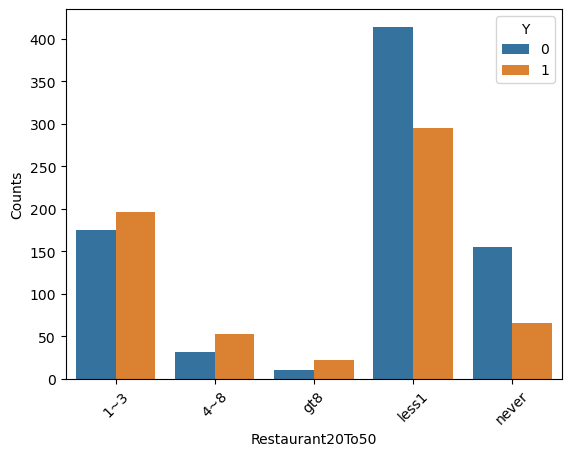

In [100]:
sns.barplot(data=df_rest_freq, x='Restaurant20To50', y='Counts', hue='Y', saturation=0.7)
plt.xticks(rotation=45)

In [101]:
df_rest_freq = df_rest.groupby(['RestaurantLessThan20', 'Y']).size().reset_index()
df_rest_freq['percentage'] = df_rest.groupby(['RestaurantLessThan20', 'Y']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)).values
df_rest_freq.columns = ['RestaurantLessThan20', 'Y', 'Counts', 'Percentage']

px.bar(df_rest_freq, x='RestaurantLessThan20', y=['Counts'], color='Y', text=df_rest_freq['Percentage'])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1~3'),
  Text(1, 0, '4~8'),
  Text(2, 0, 'gt8'),
  Text(3, 0, 'less1'),
  Text(4, 0, 'never')])

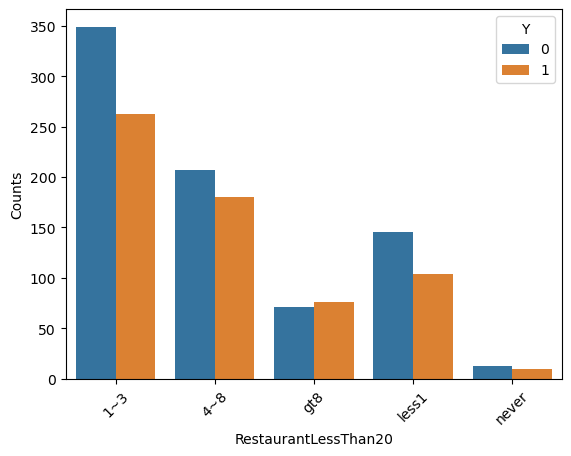

In [102]:
sns.barplot(data=df_rest_freq, x='RestaurantLessThan20', y='Counts', hue='Y', saturation=0.7)
plt.xticks(rotation=45)

Drivers who visit restaurants more often (regardless of whether they are cheaper or expensive ones) have a higher acceptance rate for restaurant coupons.

In [103]:
df_rest_time = df_rest.groupby(['time', 'Y']).size().reset_index()
df_rest_time['percentage'] = df_rest.groupby(['time', 'Y']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1)).values
df_rest_time.columns = ['time', 'Y', 'Counts', 'Percentage']

px.bar(df_rest_time, x='time', y=['Counts'], color='Y', text=df_rest_time['Percentage'])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '10AM'),
  Text(1, 0, '10PM'),
  Text(2, 0, '2PM'),
  Text(3, 0, '6PM'),
  Text(4, 0, '7AM')])

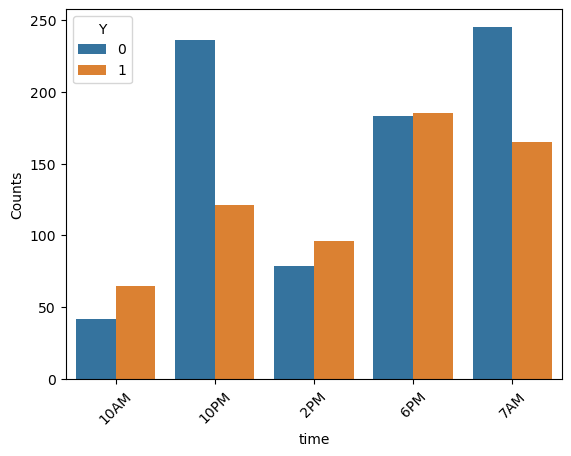

In [104]:
sns.barplot(data=df_rest_time, x='time', y='Counts', hue='Y', saturation=0.7)
plt.xticks(rotation=45)

Drivers who receive coupon between 10 AM and 6 PM are more likely to accept than those who receive the coupon at 10 PM or 7 AM.

In [105]:
# Drivers who are not going to work, and who have a partner or friend as a passenger
df_rest_dp_d = df_rest.groupby((df_rest['destination'].isin(['Home','No Urgent Place'])) & (df_rest['passanger'].isin(['Friend(s)','Partner'])))['Y'].agg('count')
df_rest_dp_n = df_rest.query('Y == 1').groupby((df_rest['destination'].isin(['Home','No Urgent Place'])) & (df_rest['passanger'].isin(['Friend(s)','Partner'])))['Y'].agg('count')
df_rest_dp_n / df_rest_dp_d

False    0.419786
True     0.545763
Name: Y, dtype: float64

Drives who receive coupons to expensive restaurants, who are not going to work and who have a partner or friend as passenger are more likely to accept coupon.

In [106]:
# Drivers who are in Sales & Related occupation, are Single, do not have children vs. others
df_rest_dp_d = df_rest.groupby((df_rest['occupation'].isin(['Sales & Related'])) & (df_rest['maritalStatus'].isin(['Single'])) & (df_rest['has_children'].isin([0])))['Y'].agg('count')
df_rest_dp_n = df_rest.query('Y == 1').groupby((df_rest['occupation'].isin(['Sales & Related'])) & (df_rest['maritalStatus'].isin(['Single'])) & (df_rest['has_children'].isin([0])))['Y'].agg('count')
df_rest_dp_n / df_rest_dp_d

False    0.439592
True     0.651163
Name: Y, dtype: float64

Drivers who are in Sales & Related occupation, are Single, do not have children have a higher acceptance rate than others.

In [107]:
# Drivers who are Female, who go to expensive restaurants more than once a month and whose income is more than 50k vs. others
df_rest_g_d = df_rest.groupby((df_rest['gender'].isin(['Female'])) & (df_rest['Restaurant20To50'].isin(['1~3','4~8','gt8'])) & (df_rest['maritalStatus'].isin(['Single'])))['Y'].agg('count')
df_rest_g_n = df_rest.query('Y == 1').groupby((df_rest['gender'].isin(['Female'])) & (df_rest['Restaurant20To50'].isin(['1~3','4~8','gt8'])) & (df_rest['maritalStatus'].isin(['Single'])))['Y'].agg('count')
df_rest_g_n / df_rest_g_d

False    0.438676
True     0.556818
Name: Y, dtype: float64

Drivers who are Female, who go to expensive restaurants more than once a month and whose income is more than 50k have a higher acceptance rate vs. others

Heatmaps of pairs of categorical variables:

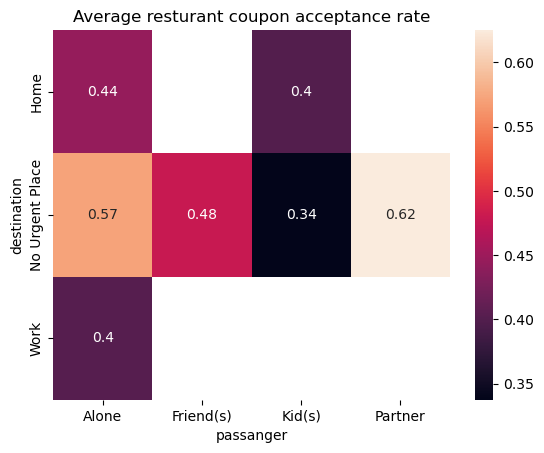

In [108]:
df_rest_ed_inc = df_rest.pivot_table(values='Y',index='destination',columns='passanger',aggfunc=np.mean)
sns.heatmap(df_rest_ed_inc,annot=True)
plt.title('Average resturant coupon acceptance rate')
plt.show()

Drivers who are not going any place urgently, and are driving alone or with kids, have higher acceptance rate than others.

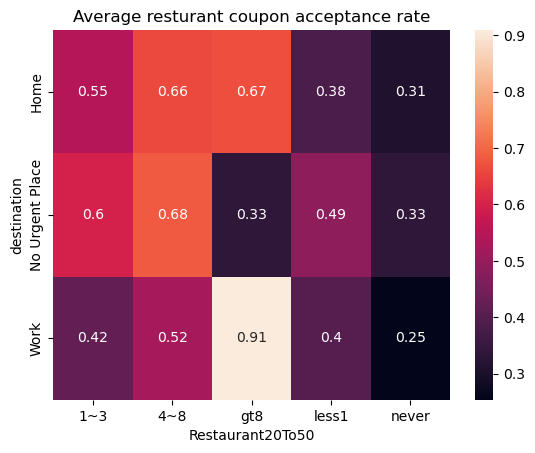

In [109]:
df_rest_exp_freq = df_rest.pivot_table(values='Y',index='destination',columns='Restaurant20To50',aggfunc=np.mean)
sns.heatmap(df_rest_exp_freq,annot=True)
plt.title('Average resturant coupon acceptance rate')
plt.show()

Drivers going to work and who visit restaurants 8 or more times a month have a very high acceptance rate.

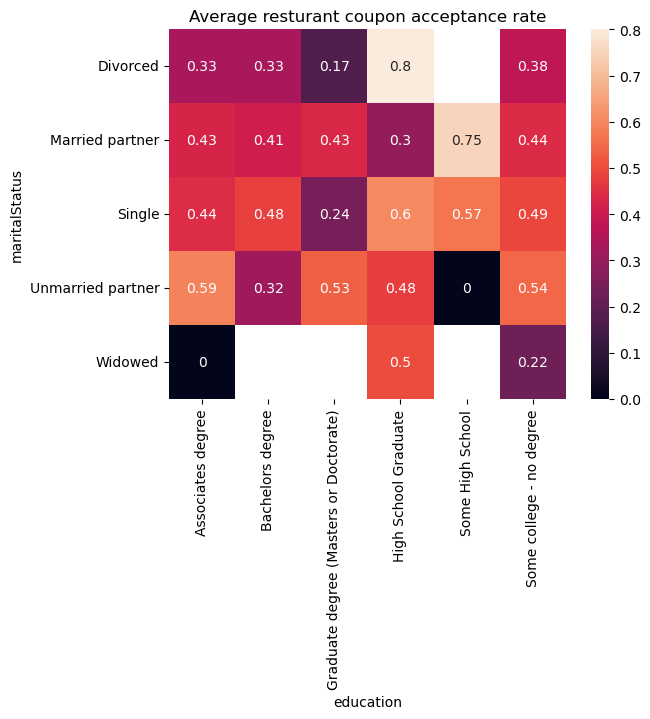

In [110]:
df_rest_mar_ed = df_rest.pivot_table(values='Y',index='maritalStatus',columns='education',aggfunc=np.mean)
sns.heatmap(df_rest_mar_ed,annot=True)
plt.title('Average resturant coupon acceptance rate')
plt.show()

Drivers who are divorced or single, who have a graduate degree have a low acceptance rate for restaurant coupons.